**Trabalho 2**

Ana Flávia Dias

Luiza Ávila

Pedro Achilles Carvalho

In [18]:
%matplotlib inline
import os
import random
import numpy as np
import time
import h5py
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import tensorflow as tf
import cv2
def load_data(path):
  x = []
  y = []
  y1 = (1,0,0,0)
  y2 = (0,1,0,0)
  y3 = (0,0,1,0)
  y4 = (0,0,0,1)
  for i in range(1,5):
    caminho = path + '/' + str(i)
    dirs = os.listdir(caminho)
    for file in dirs:
      x.append(image.imread(caminho + '/' + file))
      if i==1:
          y.append(y1)
      elif i==2:
          y.append(y2)
      elif i==3:
          y.append(y3)
      elif i==4:
          y.append(y4)

  listas = list(zip(x, y))
  random.shuffle(listas)
  x, y = zip(*listas)
  
  train_x_orig = x[600:]
  train_y = y[600:]
  test_x_orig = x[:600]
  test_y = y[:600]
  classes = [1, 2, 3, 4]
  
  """
  train_x_orig = x[4:]
  train_y = y[4:]
  test_x_orig = x[:4]
  test_y = y[:4]
  classes = [1, 2, 3, 4]
  """

  return train_x_orig, train_y, test_x_orig, test_y, classes

**Carregando Dataset**

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/trab1


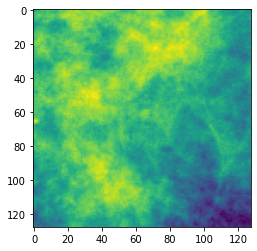

In [19]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/trab1

train_x_orig, train_y, test_x_orig, test_y, classes = load_data('dataset')
train_x_orig = np.array(train_x_orig)
train_y = np.array(train_y)
test_x_orig = np.array(test_x_orig)
test_y = np.array(test_y)
classes = np.array(classes)

import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(train_x_orig[0])

Reshape das entradas de teste e de validação, colocando a quantidade de imagem para cada um

In [20]:
train_x_orig[0].shape

(128, 128)

In [21]:
train_x_orig = train_x_orig.reshape(4424,128,128,1)
test_x_orig = test_x_orig.reshape(600,128,128,1)

In [22]:
train_y.shape

(4424, 4)

### Criação da rede neural
Usaremos o modelo sequencial, pois permite fazer o stack das camadas da rede de forma sequencial na ordem de input para output
Depois, adicionamos uma camada 2D convolucional. O primeiro número se refere ao número de outputs, seguido pelo tamanho do kernel, strides, padding, funçao de ativação. Depois realizamos o flatten do output para entrar a parte de layers conectados. A parte de Dense conecta nossos layers conectados.

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras import regularizers

model = Sequential()
model.add(Conv2D(100, kernel_size=6, strides=(7,7), padding ='valid', activation='relu', input_shape=(128,128,1)))
model.add(Conv2D(50, kernel_size=6, strides=(6,6), padding ='same', activation='relu'))
model.add(Conv2D(20, kernel_size=4, strides=(4,4), padding ='same', activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

Nessa parte, especificamos a função de loss, a métrica que será usada e o tipo de otimização.

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Salvando o modelo

In [25]:
checkpoint_filepath = 'best_file.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='loss',
    mode='min',
    save_best_only=True,
    verbose=1)

#Treinando a Rede Neural

In [26]:
model.fit(train_x_orig, train_y, batch_size=40, validation_data=(test_x_orig, test_y), epochs=100, callbacks=[model_checkpoint_callback])

Epoch 1/100
110/111 [============================>.] - ETA: 0s - loss: 1.3812 - accuracy: 0.2755
Epoch 00001: loss improved from inf to 1.38118, saving model to best_file.hdf5
111/111 [==============================] - 6s 51ms/step - loss: 1.3812 - accuracy: 0.2762 - val_loss: 1.3754 - val_accuracy: 0.3517
Epoch 2/100
110/111 [============================>.] - ETA: 0s - loss: 1.3500 - accuracy: 0.3495
Epoch 00002: loss improved from 1.38118 to 1.34984, saving model to best_file.hdf5
111/111 [==============================] - 5s 49ms/step - loss: 1.3498 - accuracy: 0.3490 - val_loss: 1.2830 - val_accuracy: 0.3767
Epoch 3/100
110/111 [============================>.] - ETA: 0s - loss: 1.2581 - accuracy: 0.3982
Epoch 00003: loss improved from 1.34984 to 1.25758, saving model to best_file.hdf5
111/111 [==============================] - 5s 49ms/step - loss: 1.2576 - accuracy: 0.3985 - val_loss: 1.1899 - val_accuracy: 0.4183
Epoch 4/100
111/111 [==============================] - ETA: 0s - los

In [27]:
model.predict(test_x_orig[:4])

array([[7.5784745e-04, 5.4920334e-01, 5.3474966e-02, 3.9656389e-01],
       [4.4747028e-01, 4.7067752e-01, 2.8000211e-02, 5.3851962e-02],
       [5.7290208e-07, 5.8030080e-02, 4.2993045e-01, 5.1203895e-01],
       [2.0029249e-02, 5.7832174e-02, 1.1535862e-01, 8.0677992e-01]],
      dtype=float32)

In [28]:
test_y[:4]

array([[0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

#Parte para a Apresentação

In [29]:
from matplotlib import image
from keras.models import load_model
from google.colab import drive
import numpy as np
drive.mount('/content/drive')
%cd /content/drive/My Drive

model = load_model('trab1/best_file.hdf5')

imagem = image.imread('p_e_left_cc(1).png')
#print(imagem.shape)
imagem = np.array([imagem])
#print(imagem.shape)
imagem = np.expand_dims(imagem , -1)
#print(imagem.shape)
#model.summary()
model.predict([imagem])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


array([[0.25761774, 0.6716385 , 0.04478269, 0.02596111]], dtype=float32)